# GoogLeNet
## idea.1 : Auxiliary classifier
## idea.2 : Inception module
딥러닝은 이런 아이디어에서 출발한다. 아이디어를 기반으로 모델을 구현하고 성능을 본다.

## Inception module
input tensor : 192, 100, 100 <br>
out_channels : 변경가능.<br>
사이즈 이유 : 다음 작업으로 concat 진행할때 동일한 size 기준으로 병합<br>
1x1 convolutions : in_channels=192, out_channels=64, kernel_size=1, padding=0, stride=1 -> (64, 100, 100)<br>
3x3 convolutions : in_channels=192, out_channels=128, kernel_size=3, padding=1, stride=1 -> (128, 100, 100) <br>
5x5 convolutions : in_channels=192, out_channels=32, kernel_size=5, padding=2, stride=1 -> (32, 100, 100)<br>
3x3 max pooling : kerner_size=3, padding=1, stride=1 -> (192, 100, 100) <br>

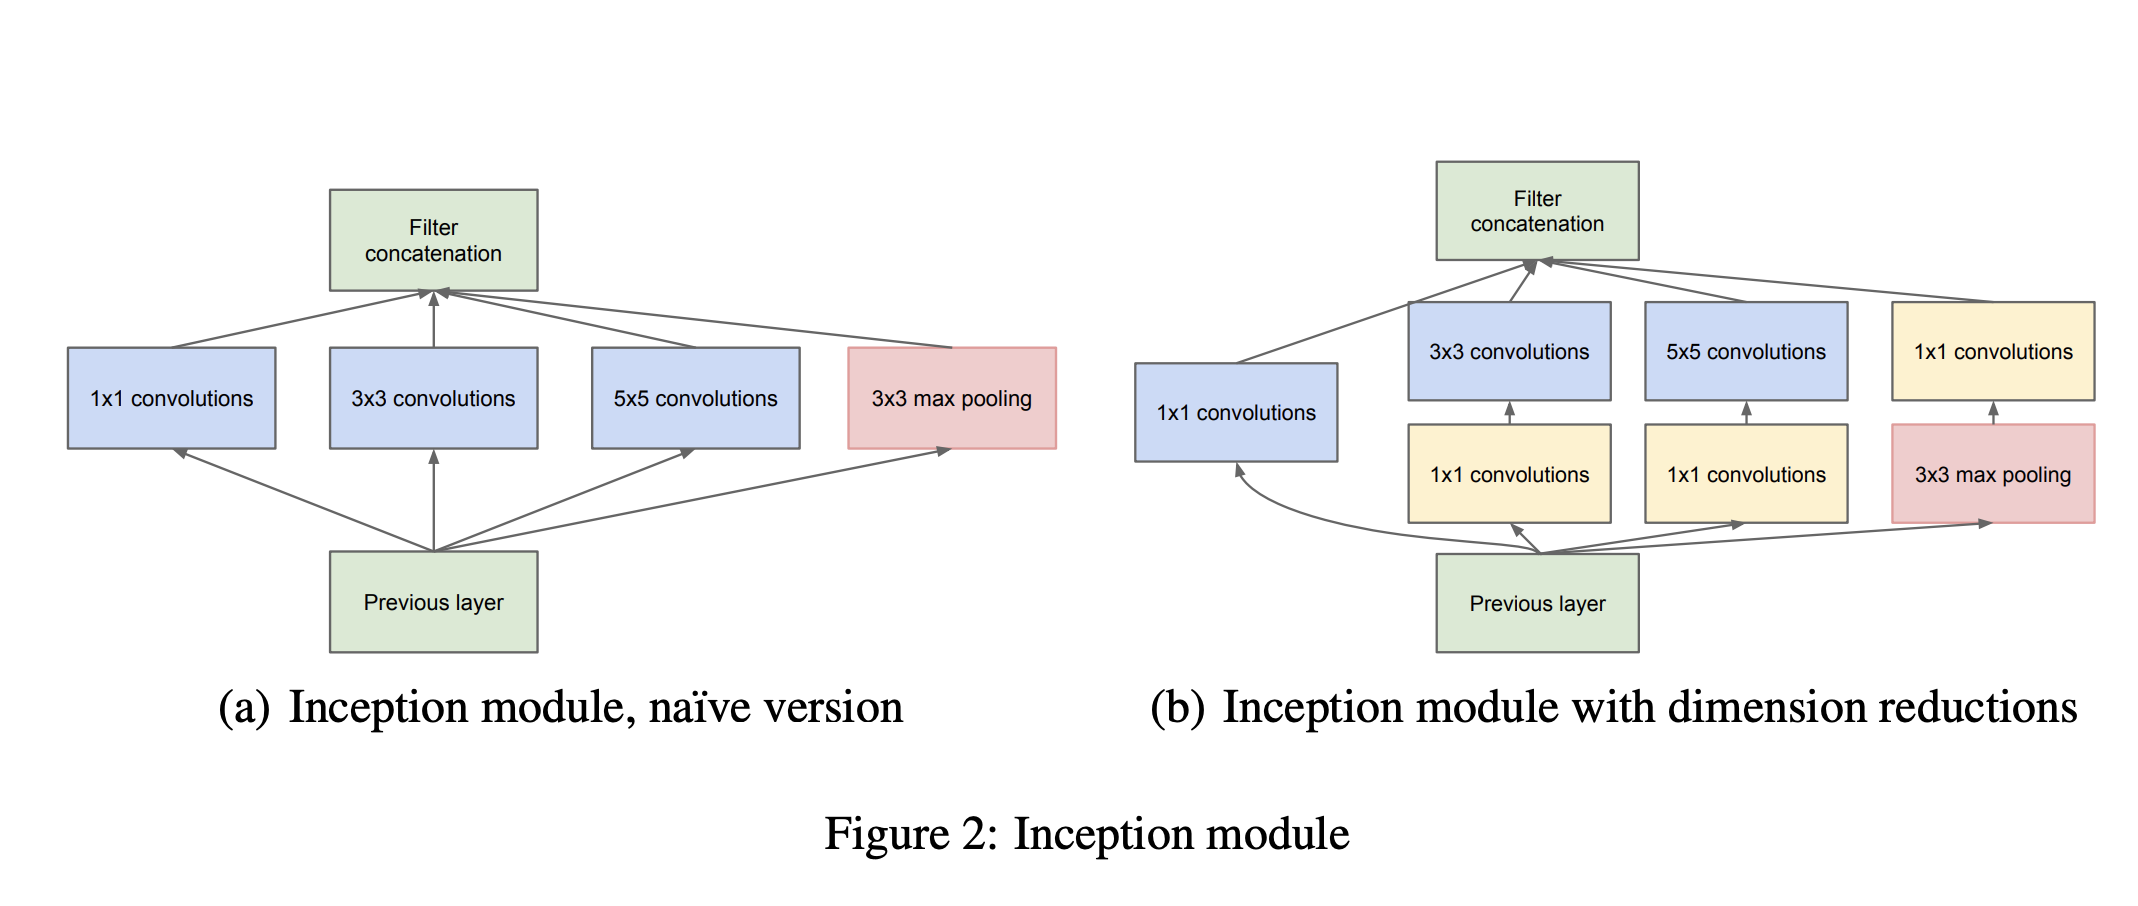

In [13]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, padding=0, stride=1):
        super(ConvBlock, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                                kernel_size=kernel_size, padding=padding, stride=stride),
            nn.ReLU()
        )

    def __call__(self, x):
        x = self.layers(x)
        return x

In [14]:

import torch

input_tensor = torch.randn(size=(192, 100, 100))
branch1 = ConvBlock(in_channels=input_tensor.shape[0], out_channels=64, kernel_size=1, padding=0, stride=1)
out_branch1 = branch1(input_tensor)
print(out_branch1.shape)

branch2 = ConvBlock(in_channels=input_tensor.shape[0], out_channels=128, kernel_size=3, padding=1, stride=1)
out_branch2 = branch2(input_tensor)
print(out_branch2.shape)

branch3 = ConvBlock(in_channels=input_tensor.shape[0], out_channels=32, kernel_size=5, padding=2, stride=1)
out_branch3 = branch3(input_tensor)
print(out_branch3.shape)

branch4 = ConvBlock(in_channels=input_tensor.shape[0], out_channels=input_tensor.shape[0], kernel_size=3, padding=1, stride=1)
out_branch4 = branch4(input_tensor)
print(out_branch4.shape)

# 배치 없는경우 axis=0 # channels 을 concat
# 배치 있는경우 axis=1
# torch.concat([out_branch1, out_branch2, out_branch3, out_branch4], dim=0)
output = torch.concat([out_branch1, out_branch2, out_branch3, out_branch4], dim=0)
print(output.shape)

torch.Size([64, 100, 100])
torch.Size([128, 100, 100])
torch.Size([32, 100, 100])
torch.Size([192, 100, 100])
torch.Size([416, 100, 100])


In [37]:
import torch
import torch.nn as nn

class InceptionNaive(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3, ch5x5):
        super(InceptionNaive, self).__init__()
        self.branch1 = ConvBlock(in_channels=in_channels, out_channels=ch1x1, kernel_size=1, padding=0, stride=1)
        self.branch2 = ConvBlock(in_channels=in_channels, out_channels=ch3x3, kernel_size=3, padding=1, stride=1)
        self.branch3 = ConvBlock(in_channels=in_channels, out_channels=ch5x5, kernel_size=5, padding=2, stride=1)
        self.branch4 = nn.MaxPool2d(kernel_size=3, padding=1, stride=1)

    def forward(self, x):
        out_branch1 = self.branch1(x)
        out_branch2 = self.branch2(x)
        out_branch3 = self.branch3(x)
        out_branch4 = self.branch4(x)
        x = torch.concat([out_branch1, out_branch2, out_branch3, out_branch4], dim=0)
        return x
    
if __name__ == "__main__":
    input_tensor = torch.randn(size=(192, 100, 100))
    inception = InceptionNaive(192, 64, 128, 32)
    output = inception(input_tensor)
    print(output.shape)

torch.Size([416, 100, 100])


In [38]:
input_tensor = torch.randn(size=(192, 100, 100))
input_size = [input_tensor.shape[0], 64, 128, 32]
inception = InceptionNaive(*input_size)
output = inception(input_tensor)
print(output.shape)

torch.Size([416, 100, 100])
